In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
# cv2 - For image processing
import cv2
import random

In [2]:
DATADIR="C:\\Users\\Asus\\Desktop\\VigilEye\\VigilEye-Drowsiness-Detection\\train"

In [3]:
CATEGORIES=["Closed_Eyes","Open_Eyes"]

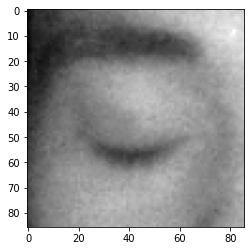

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break 

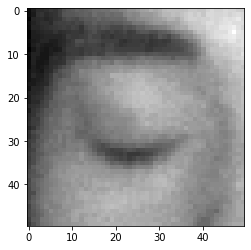

In [15]:
IMG_SIZE = 50
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [16]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [17]:
create_training_data()
print(len(training_data))

4000


In [18]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
1
1
1
0
1


In [19]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 45]
   [ 47]
   [ 43]
   ...
   [156]
   [157]
   [162]]

  [[ 52]
   [ 57]
   [ 54]
   ...
   [150]
   [156]
   [157]]

  [[ 46]
   [ 46]
   [ 42]
   ...
   [151]
   [150]
   [167]]

  ...

  [[142]
   [142]
   [143]
   ...
   [172]
   [170]
   [165]]

  [[142]
   [136]
   [145]
   ...
   [172]
   [165]
   [164]]

  [[139]
   [149]
   [147]
   ...
   [171]
   [169]
   [158]]]]


In [20]:
import pickle

In [21]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()